# Behaviour analysis of bonsai VR and 2p

Once you temporally align the behav and funcimg data, it is time to inspect the dataset and do cool stuff!

In [1]:
import numpy as np
import importlib
import parse_bonsai_functions as parse_bonsai_functions
import parse_nwb_functions as parse_nwb_functions

importlib.reload(parse_bonsai_functions)
importlib.reload(parse_nwb_functions)

import cellTV.cellTV_functions_cohort3 as celltv

## Parse mouse and date info into root session folder

In [2]:
PREPROCESSED_BEHAV = 'preprocessed_behav_Nov2025'

mouse_id = "010"
session = "full014"
root = f"/ceph/mrsic_flogel/public/projects/SuKuSaRe_20250923_HFScohort3/{PREPROCESSED_BEHAV}/derivatives" # Use preprocessed dir here this time
session_path = parse_nwb_functions.find_base_path(mouse_id, session, root)

Found folder: /ceph/mrsic_flogel/public/projects/SuKuSaRe_20250923_HFScohort3/preprocessed_behav_Nov2025/derivatives/sub-010/ses-full014


## Load all the relevant files
- settings (session only)
- aligned NWB file

In [3]:
ses_settings, _ = parse_nwb_functions.load_settings(session_path)
nwb_path = parse_nwb_functions.find_nwbfile(session_path)

## Example: Use Pynapple to read and analyze data
Here is one example of how you can interact with stored data, using `pynapple`. pynapple has lots of functions to align two datasets with different temporal resolution/scale.
https://pynapple.org/user_guide/03_core_methods.html

In [4]:
import pynapple as nap

In [5]:
data = nap.load_file(nwb_path)
print(data)

vrabcd_2p_preprocessed_sub-010_ses-full014
┍━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━┑
│ Keys                         │ Type      │
┝━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┿━━━━━━━━━━━┥
│ RoiResponseSeriesChan1Plane0 │ TsdFrame  │
│ NeuropilChan1Plane0          │ TsdFrame  │
│ DeconvolvedChan1Plane0       │ TsdFrame  │
│ DfOverFChan1Plane0           │ TsdFrame  │
│ TwoPhotonSeriesGreen         │ TsdTensor │
│ TrialLickedReward            │ Tsd       │
│ TrialAutoReward              │ Tsd       │
│ Treadmill                    │ Tsd       │
│ SyncTTL                      │ Tsd       │
│ Position                     │ Tsd       │
│ ManualReward                 │ Tsd       │
│ Licks                        │ Tsd       │
│ Events_release               │ Tsd       │
│ Events_prepare               │ Tsd       │
│ Events_flush                 │ Tsd       │
┕━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┷━━━━━━━━━━━┙


In [6]:
# And you can inspect data...
# 2p
print(data['DfOverFChan1Plane0'])

Time (s)                 0           1           2           3          4  ...
--------------  ----------  ----------  ----------  ----------  ---------  -----
3.7314           0.182141    1.0775      0.704935    0.724592   0.352474   ...
3.75387191      -0.580016    0.155657    0.605038    1.34177    0.694811   ...
3.77634382       1.69263     0.287614    0.492966    0.667879   0.0396547  ...
3.79881573      -1.01494     0.202649   -0.369035    0.223277   0.667325   ...
3.82128764      -0.192755    0.642293    0.916019    0.589341   0.250917   ...
3.843759551      1.65863    -0.251112    0.563424    0.384522   0.403093   ...
3.866231461      1.98186     0.325743    0.0182892   0.494491   0.136142   ...
...                                                                        ...
1846.270725843  -0.550031    0.511028   -0.498008   -0.0355474  0.231595   ...
1846.293197753   1.40463    -0.106592   -0.191349    0.275547   0.376383   ...
1846.315669663   0.553385    0.24767     0.0733578

In [7]:
# behav - binary
print(f'Animals got {np.sum(data['TrialLickedReward'])} rewards in this session')
print(data['TrialLickedReward'])

Animals got 80 rewards in this session
Time (s)
--------------  --
4.789768992      0
4.811991214      0
4.834213436      0
4.856435658      0
4.87865788       0
4.900880103      0
4.923102325      0
...
1796.745324547   0
1796.767546769   0
1796.789768992   0
1796.811991214   0
1796.834213436   0
1796.856435658   0
1796.87865788    0
dtype: int64, shape: (80645,)


In [8]:
# behav - continuous
print(data['Treadmill'])

Time (s)
--------------  --------
4.789768992     0.241274
4.811991214     0.266407
4.834213436     0.29154
4.856435658     0.316673
4.87865788      0.316673
4.900880103     0.286513
4.923102325     0.256354
...
1796.745324547  0
1796.767546769  0
1796.789768992  0
1796.811991214  0
1796.834213436  0
1796.856435658  0
1796.87865788   0
dtype: float64, shape: (80645,)


## Example: Use NWBHDF5IO to read and analyze data
But Pynapple is known to have limited varieties of functions

In [9]:
pd1 = parse_nwb_functions.get_ttl_onsets(nwb_path, 'Photodiode1ONTTL')
# pd2 = parse_nwb_functions.get_ttl_onsets(nwb_path, 'Photodiode3ONTTL')
print(f'Photodiode 1 detected {len(pd1)} white squares')
# print(f'Photodiode 2 detected {len(pd2)} white squares')

Photodiode 1 detected 439 white squares


In [10]:
mean_img, image_mask, ROICentroids = parse_nwb_functions.get_s2pstat_nwb(nwb_path)
masks = celltv.concat_masks(image_mask)

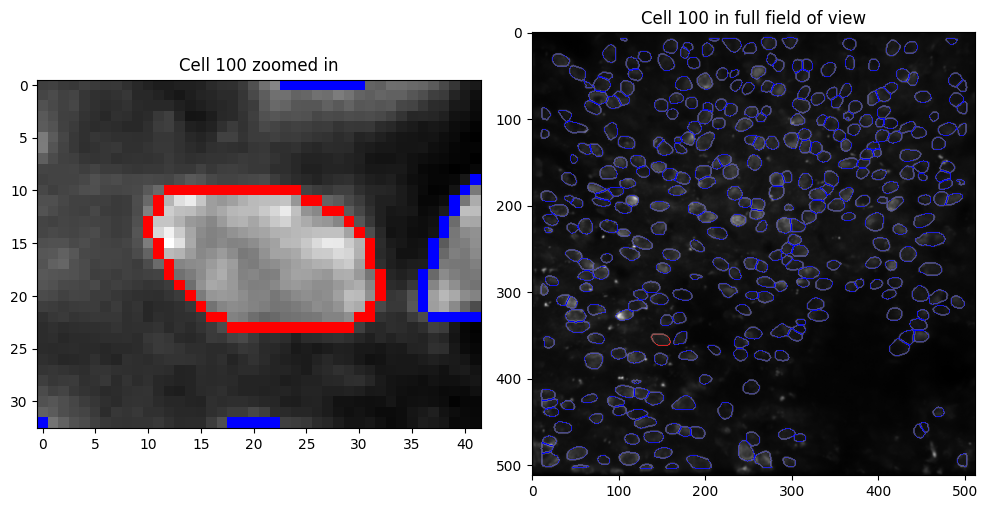

In [11]:
cell_id = 100
celltv.show_cell_fov(cell_id, mean_img, masks)